In [3]:
from collections import defaultdict

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)
    def addEdge(self,u,v):
        self.graph[u].append(v)
    def DFSUtil(self,v,visited):
        visited[v]=True
        print(v, end=" ")
        for i in self.graph[v]:
            if visited[i]==False:
                self.DFSUtil(i,visited)
    def DFS(self):
        V = len(self.graph)
        visited = [False]*(V)
        for i in range(V):
            if visited[i]==False:
                self.DFSUtil(i,visited)
                
g = Graph()
g.addEdge(0, 1) 
g.addEdge(0, 2) 
g.addEdge(1, 2) 
g.addEdge(2, 0) 
g.addEdge(2, 3) 
g.addEdge(3, 3)
g.addEdge(3, 4)
g.addEdge(4,3)

 
print("Following is Depth First Traversal")
g.DFS()

Following is Depth First Traversal
0 1 2 3 4 

In [4]:
class Graph:
    def __init__(self):
        self.graph = defaultdict(list)
        
    def addEdge(self,u,v):
        self.graph[u].append(v)
        self.visited=[]
        
    def BFS(self,s):
        queue = []
        queue.append(s)
        self.visited.append(s)
        while queue:
            s = queue.pop(0)
            print(s,end=" ")
            for i in self.graph[s]:
                if i not in self.visited:
                    queue.append(i)
                    self.visited.append(s)
                    
g = Graph()
g.addEdge(0, 1) 
g.addEdge(0, 2) 
g.addEdge(1, 2) 
g.addEdge(2, 0) 
g.addEdge(2, 3) 
g.addEdge(3, 3) 
  
print ("Following is Breadth First Traversal"
                  " (starting from vertex 2)") 
g.BFS(2) 
  

Following is Breadth First Traversal (starting from vertex 2)
2 0 3 1 3 

In [7]:
import heapq

# Define the maze as an 8x8 matrix
maze = [
    ['S', ' ', ' ', 'X', ' ', 'X', ' ', ' '],
    ['X', 'X', ' ', ' ', ' ', 'X', 'X', ' '],
    [' ', 'X', 'X', 'X', ' ', 'X', ' ', 'X'],
    ['X', ' ', 'X', ' ', ' ', ' ', 'X', ' '],
    ['X', ' ', ' ', 'X', ' ', 'X', ' ', ' '],
    ['X', 'X', ' ', 'X', 'G', 'X', ' ', ' '],
    ['X', ' ', ' ', 'X', ' ', 'X', 'X', 'X'],
    ['X', 'X', 'X', 'X', ' ', ' ', ' ', 'X']
]

# Define possible movements (up, down, left, right)
movements = [(0, 1), (0, -1), (1, 0), (-1, 0)]

def heuristic(node, goal):
    # Manhattan distance heuristic
    return abs(node[0] - goal[0]) + abs(node[1] - goal[1])

def astar_search(maze, start, goal):
    open_set = []
    closed_set = set()

    heapq.heappush(open_set, (0, start, []))  # Priority queue: (f-value, current node, path)

    while open_set:
        _, current, path = heapq.heappop(open_set)

        if current == goal:
            return path + [current]

        if current in closed_set:
            continue

        closed_set.add(current)

        for dx, dy in movements:
            x, y = current
            neighbor = (x + dx, y + dy)

            if (
                0 <= neighbor[0] < len(maze) and
                0 <= neighbor[1] < len(maze[0]) and
                maze[neighbor[0]][neighbor[1]] != 'X'
            ):
                g = len(path) + 1
                h = heuristic(neighbor, goal)
                f = g + h
                heapq.heappush(open_set, (f, neighbor, path + [current]))

    return None  # No path found

start = (0, 0)
goal = (5, 4)

path = astar_search(maze, start, goal)

if path:
    for row in range(len(maze)):
        for col in range(len(maze[0])):
            if (row, col) == start:
                print('S', end=' ')
            elif (row, col) == goal:
                print('G', end=' ')
            elif (row, col) in path:
                print('P', end=' ')  # Path
            else:
                print(maze[row][col], end=' ')
        print()
else:
    print("No path found!")


S P P X   X     
X X P P P X X   
  X X X P X   X 
X   X   P   X   
X     X P X     
X X   X G X     
X     X   X X X 
X X X X       X 


Confusion Matrix for Test Data:
[[124  19]
 [ 32  56]]
Accuracy Score for Test Data: 0.7792207792207793
Accuracy Score for Training Data: 0.7635009310986964


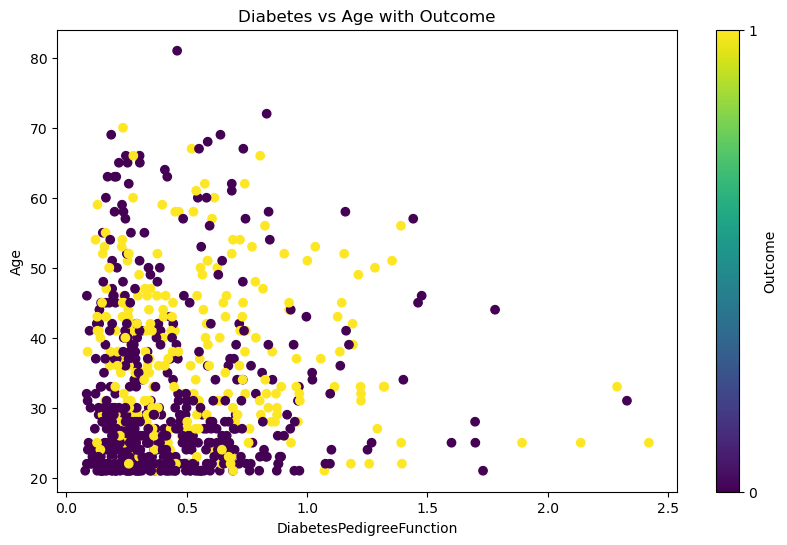

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

df = pd.read_csv('diabetes.csv')

df.isna().sum()

# sns.heatmap(df.corr(method='kendall'), annot=True)
# plt.show()

X = df.drop(columns=['Outcome'])
y = df['Outcome']

xtr, xts, ytr, yts = train_test_split(X, y, train_size=.7, random_state=123)

sc = StandardScaler()
sc_obj = sc.fit(xtr)

sctr, scts = sc_obj.transform(xtr), sc_obj.transform(xts)

clsfr = GaussianNB()
clsfr.fit(sctr, ytr)

y_prd_ts = clsfr.predict(scts)
y_prd_tr = clsfr.predict(sctr)

conf_matrix_ts = confusion_matrix(yts, y_prd_ts)
print("Confusion Matrix for Test Data:")
print(conf_matrix_ts)

acc_score_ts = accuracy_score(yts, y_prd_ts)
print(f"Accuracy Score for Test Data: {acc_score_ts}")

acc_score_tr = accuracy_score(ytr, y_prd_tr)
print(f"Accuracy Score for Training Data: {acc_score_tr}")

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.scatter(df['DiabetesPedigreeFunction'], df['Age'], c=df['Outcome'], cmap='viridis')
plt.colorbar(label='Outcome', ticks=[0, 1])
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Age')
plt.title('Diabetes vs Age with Outcome')
plt.show()


In [17]:
!pip3 install pgmpy

ERROR: Could not find a version that satisfies the requirement pgmpy (from versions: none)
ERROR: No matching distribution found for pgmpy


In [16]:
import pandas as pd
import numpy as np
import csv

from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination

heart_df = pd.read_csv('heart.csv')
heart_df = heart_df.replace('?',np.nan)

heart_df.columns

model = BayesianNetwork([('age','target'),('sex','target'),('exang','target'),('cp','target'),
                ('target','restecg'),('target','chol')])

model.fit(heart_df,estimator = MaximumLikelihoodEstimator)

heart_disease_infer = VariableElimination(model)

print('\n 1. Probability of Heart Disease given evidence = restecg')
q1 = heart_disease_infer.query(variables = ['target'],evidence={'restecg':1})
print(q1)

print('\n 2. Probability of Heart Disease given evidence = cp')
q2 = heart_disease_infer.query(variables = ['target'],evidence={'cp':2})
print(q2)

for c in heart_df:
    print(c)
    print(heart_df[c].value_counts())
    
    

ModuleNotFoundError: No module named 'pgmpy'

-0.9029910753072274
3


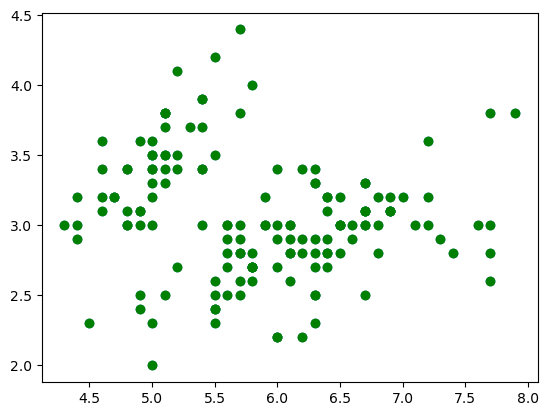

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture
iris = datasets.load_iris()
X =iris.data[:,:2]
d = pd.DataFrame(X)
plt.scatter(d[0],d[1])
gmm = GaussianMixture(n_components=3)
gmm.fit(iris.data[:,2:])
labels = gmm.predict(d)
d['labels'] = labels
d0 = d[d['labels']==0]
d1 = d[d['labels']==1]
d2 = d[d['labels']==2]
plt.scatter(d0[0],d0[1],c='red')
plt.scatter(d1[0],d1[1],c='yellow')
plt.scatter(d2[0],d2[1],c='green')
print(gmm.lower_bound_)
print(gmm.n_iter_)